# Part 1: Selection of Cryptocurrency

For the purpose of this analysis, Basic Attention Token (BAT-USD) is selected. The purpose of the creation of BAT is to improve security and efficiency of digital advertising through blockchain technology. BAT works as Ethereum (ETH) native token. BAT's white paper is dated Feb. 10, 2021. The Brave Browser however is available for download even though is still being developed till now (2022) and that there are 54.5 million monthly active users and 16 million daily users of the Brave browser.

Importing packages for calculations and analyzing.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si

Importing data for "BAT-USD" from yahoo finance for two year time period i.e. 01/12/2020 to 30/11/2022

In [8]:
data = yf.download("BAT-USD", start="2020-12-01", end="2022-11-30")

[*********************100%***********************]  1 of 1 completed


In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,0.242459,0.258494,0.232553,0.234132,0.234132,186800193
2020-12-02,0.234148,0.242816,0.230629,0.240770,0.240770,123401127
2020-12-03,0.240774,0.246208,0.238326,0.240909,0.240909,129937162
2020-12-04,0.240933,0.247894,0.226443,0.229610,0.229610,150965079
2020-12-05,0.229547,0.235012,0.226432,0.234402,0.234402,122589503


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002078A917518>,
      dtype=object)

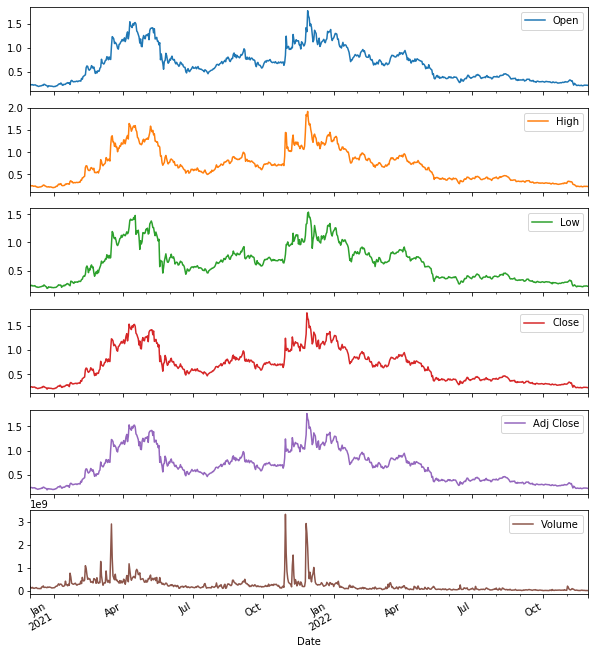

In [10]:
data.plot(figsize=(10, 12), subplots=True)

Graph shows the high fluctuations during the months from March 2021 to May 2021 and then from December 2021 to the start of February 2022. After that time period price of cryptocurrency is decreasing. 

For Annualized volatility, 3-month data is being used.

In [16]:
data = yf.download("BAT-USD", start="2022-09-01", end="2022-11-30")

[*********************100%***********************]  1 of 1 completed


First we have to find the log returns of the closing prices of the cryptocurrency

In [17]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In order to annualized the volatiliy, multiplying it with square root of 365 i.e. the trading days of the crypocurrency per year

In [18]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 81.46 %


Cryptocurrencies are very volatile in nature, tends to have higher volatility values.

# Part 2: Methodologies

For the purpose of designing derivative, two methods are used i.e. Black Scholes Model and Monte Carlo Simulation. Vanilla option (call) will be designed using these two methods.

### 1) Black Scholes Method

In [20]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [21]:
S = 0.23
K = 0.35
T = 0.25   # 3 Months time period
r = 0.03
q = 0      # because cryptocurrencies are not pay dividend

In [22]:
euro_option_bs(S, K, T, r, vol, 'call')

0.009243349431932217

Call price from Black Scholes method

In [23]:
S = np.linspace(0.1,0.35,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 0.35, 0.25, 0.03, 0.81, 'call')

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

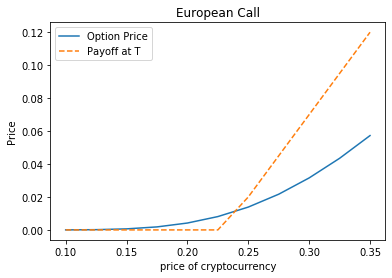

In [26]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-0.23,0), '--')
plt.xlabel('price of cryptocurrency')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

### 2) Monte Carle Simulation

In [57]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [58]:
T = 0.25
r = 0.03
sigma = 0.81
S0 = 0.23
K = 0.35

In [59]:
S = mcs_simulation_np(1000)

In [60]:
S = np.transpose(S)
S

array([[0.23      , 0.23269844, 0.23597168, ..., 0.32501724, 0.32826157,
        0.32363997],
       [0.23      , 0.22674959, 0.22562992, ..., 0.31759676, 0.31718413,
        0.31250681],
       [0.23      , 0.22578764, 0.22299823, ..., 0.13202377, 0.130188  ,
        0.13293319],
       ...,
       [0.23      , 0.22962133, 0.22442381, ..., 0.14661217, 0.14668632,
        0.14521191],
       [0.23      , 0.2270647 , 0.22794973, ..., 0.11158365, 0.11115465,
        0.10883154],
       [0.23      , 0.22798257, 0.22695294, ..., 0.23628561, 0.2329298 ,
        0.23319221]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

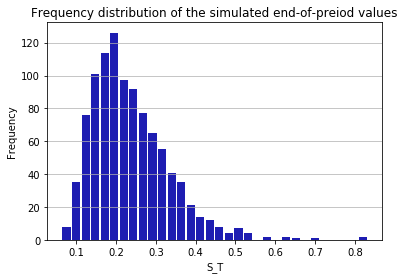

In [61]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.9, rwidth=0.85)

plt.grid(axis='y', alpha=0.9)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [62]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.008906073031480258


As a seller of the option, I will sell the call options at the price calculated through Black Scholes Model, which is $0.00924 because of the two reasons. First reason is already mentioned above that Black Scholes measure more accurately in the case the underlying asset is of high volatile nature, which is true in this case as BAT-USD (cryptocurrency) have high volatility of 81.46%. Secondly, the price calculated through Black Scholes is slightly higher than the price calculated through Monte Carlo Simulation, so being a seller I tend to sell my call option on higher price.

# Part 3: Greeks

Calculating greeks for risk management

In order to draw graph for each greek, Importing package for 3d graph

In [63]:
from mpl_toolkits.mplot3d import Axes3D

### 1) Delta

In [64]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [65]:
S = np.linspace(0.10, 0.50, 50)
T = np.linspace(0.10, 0.50, 50)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 0.35, T[i], 0.03, 0, 0.81, 'call')

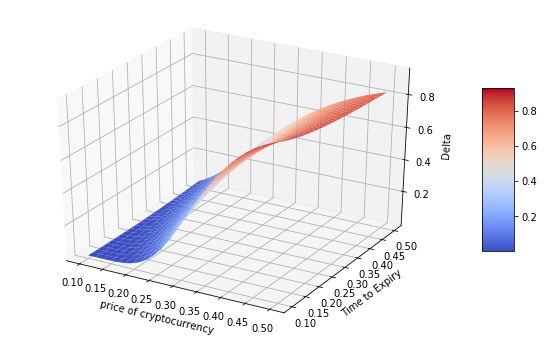

In [66]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [99]:
d = delta(0.23, 0.35, 0.25, 0.03, 0, 0.81, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.2073 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.2073 .


### 2) Gamma

In [68]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [69]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 0.35, T[i], 0.03, 0, 0.81, 'call')

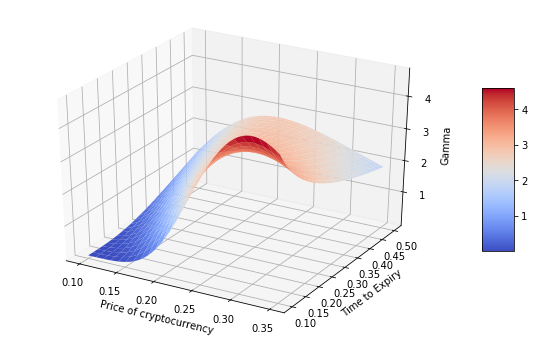

In [70]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [72]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [98]:
gamma(0.23, 0.35, 0.25, 0.03, 0, 0.81, 'call')

3.0708578518790635

The gamma value for BAT-USD is 3.07 which is very high. This value shows that if the price of BAT-USD increases or decreases by $1 than the delta value will increase or decrease by 3.07 respectively.

### 3) Speed

In [75]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [76]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 0.35, T[i], 0.03, 0, 0.81, 'call')

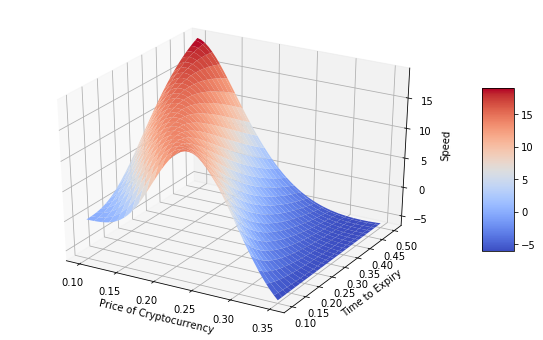

In [77]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [97]:
speed(0.23, 0.35, 0.25, 0.03, 0, 0.81, 'call')

6.769035150521431

### 4) Theta

In [79]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [80]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 0.35, T[i], 0.03, 0, 0.81, 'call')

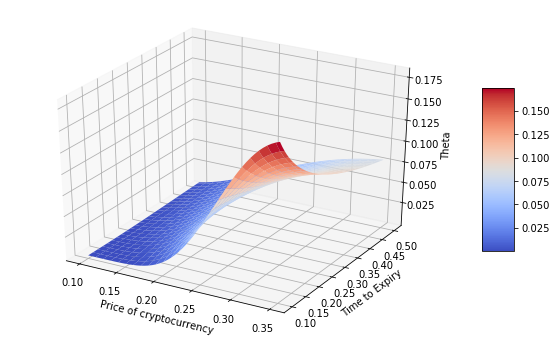

In [81]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [96]:
theta(0.23, 0.35, 0.25, 0.03, 0, 0.81, 'call')

0.054449106440466875

The calculated value of theta for BAT-USD call option is 0.054, which means that, all else remaining the same, with every single day towards maturity, the value of call option will increase by $0.054. 

### 5) Rho

In [84]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [85]:
S = np.linspace(0.1, 0.35, 50)
T = np.linspace(0.1, 0.50, 50)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 0.35, T[i], 0.03, 0, 0.81, 'call')

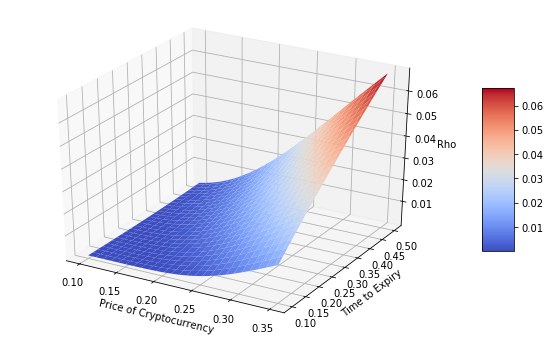

In [86]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [95]:
rho(0.23, 0.35, 0.25, 0.03, 0, 0.81, 'call')

0.009649293849371953

The Value of rho in case of BAT-USD call option is 0.0096, which indicates that with the increase in 1% in the interest rate the price of call option will increase by $0.0096. 

### 6) Vega

In [92]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [93]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 0.35, T[i], 0.03, 0, 0.81, 'call')

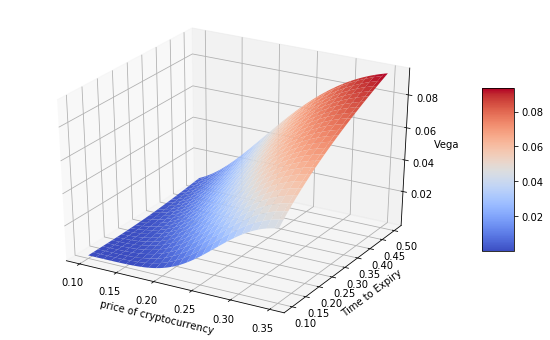

In [94]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [91]:
v = vega(0.23, 0.35, 0.25, 0.03, 0, 0.81, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 0.0329 . If the volatility increases 1%, then the value of the option will increase $ 0.000329 .


The Vega value for BAT-USD is 0.032, which indicated that call price of option will increase by 3.2 cents with every 1% increase in the implied volatility. 